<a href="https://colab.research.google.com/github/sindhu000018/2016-10-facebook-fact-check/blob/master/Model_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef

# import bob as bob

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!pip install bob

In [0]:
csv_len=len(list(csv.reader(open('feature_Selected_n318.csv'))))
print(csv_len)

32832


In [0]:
df =pd.read_csv('feature_Selected_n318.csv',names=["1", "2", "3", "4","5", "6", "7", "8","9", "10", "11", "12", "13",
                                      "14", "15", "16", "17","18", "19", "20", "21","22", "23", "24", "25", "26",
                                       "27", "28", "29", "30","31", "32", "33", "34","35", "36", "37", "38", "39",
                                       "40", "41", "42", "43","44", "45", "46", "47","48", "49", "50", "51", "52",
                                       "53","54","55","56","57","58","59","60","61","62","63","64","65","66","67",
                                       "68","69","70","71","72","73","74","75","76","77","78","79","80","81","82",
                                       "83","84","85","86","87","88","89","90","91","92","93","94","95","96","97",
                                       "98","99","100","101","102","103","104","105","106","107","108","109","110",
                                       "111","112","113","114","115","116","117","118","119","120","121","122","123",
                                       "124","125","126","127","128","129","130","131","132","133","134","135","136",
                                       "137","138","139","140","141","142","143","144","145","146","147","148",
                                       "149","150","151","152","153","154","155","156",
                                       "Class"])

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float32)
df = clean_dataset(df)

features = df[["1", "2", "3", "4","5", "6", "7", "8","9", "10", "11", "12", "13",
                                      "14", "15", "16", "17","18", "19", "20", "21","22", "23", "24", "25", "26",
                                       "27", "28", "29", "30","31", "32", "33", "34","35", "36", "37", "38", "39",
                                       "40", "41", "42", "43","44", "45", "46", "47","48", "49", "50", "51", "52",
                                       "53","54","55","56","57","58","59","60","61","62","63","64","65","66","67",
                                       "68","69","70","71","72","73","74","75","76","77","78","79","80","81","82",
                                       "83","84","85","86","87","88","89","90","91","92","93","94","95","96","97",
                                       "98","99","100","101","102","103","104","105","106","107","108","109","110",
                                       "111","112","113","114","115","116","117","118","119","120","121","122","123",
                                       "124","125","126","127","128","129","130","131","132","133","134","135","136",
                                       "137","138","139","140","141","142","143","144","145","146","147","148",
                                       "149","150","151","152","153","154","155","156"]]
class_label = df[["Class"]]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# #Retain selected features ---- F2
# final_df = df.drop(columns=['2','3','5','6','15','16','17','18','22','23','24','27','29','31','32','35','37','40','43','44','45','51','52'])
# final_df.head()
# features = final_df[['1','4','7','8','9','10','11','12','13','14','19','20','21','25','26','28','30','33','34','36','38','39','41','42','46','47','48','49','50']]
# class_label = final_df[['Class']]
# #features.head()
# class_label.head()

In [0]:
# #Retain selected features --- F1
# final_df = df.drop(columns=['2','3','5','6','10','11','15','16','17','18','22','23','24','27','29','31','32','33','35','37','40','42','43','44','45','51','52'])
# final_df.head()
# features = final_df[['1','4','7','8','9','12','13','14','19','20','21','25','26','28','30','34','36','38','39','41','46','47','48','49','50']]
# class_label = final_df[['Class']]
# #features.head()
# #class_label.head()

In [0]:
#Split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(features, class_label, test_size=0.3)

In [0]:
#Random Forests
random_clf=RandomForestClassifier(n_estimators=100)
random_clf.fit(X_train,y_train)
randomforest_pred=random_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, randomforest_pred))
print("F1 score:",metrics.f1_score(y_test, randomforest_pred))
print("Precision:",metrics.precision_score(y_test, randomforest_pred))
print("Recall:",metrics.recall_score(y_test, randomforest_pred))
# rf_Score = metrics.accuracy_score(y_test, randomforest_pred)
# supportVectorClassifier = SVC(kernel = 'linear', probability = True)
# supportVectorClassifier.fit(X_train, y_train)
# svc_pred=random_clf.predict(X_test)
# print("Accuracy:",metrics.accuracy_score(y_test, svc_pred))
# probs = supportVectorClassifier.predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.9973601380850848
F1 score: 0.997268333683547
Precision: 0.9991578947368421
Recall: 0.9953859060402684


In [0]:
# #logistic Regression
# logisticRegr = LogisticRegression()
# logisticRegr.fit(X_train,y_train)
# log_predictions = logisticRegr.predict(X_test)
# print("Accuracy:",metrics.accuracy_score(y_test, log_predictions))
# print("F1 score:",metrics.f1_score(y_test, log_predictions))
# print("Precision:",metrics.precision_score(y_test, randomforest_pred))
# print("Recall:",metrics.recall_score(y_test, randomforest_pred))
# score = logisticRegr.score(X_test, y_test)
# print(score)

In [0]:
#Multi Layer Perceptron
multiLayerPerceptron = MLPClassifier(solver='sgd')
multiLayerPerceptron.fit(X_train,y_train)
MLP_predictions = multiLayerPerceptron.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, MLP_predictions))
print("F1 score:",metrics.f1_score(y_test, MLP_predictions))
print("Precision:",metrics.precision_score(y_test, MLP_predictions))
print("Recall:",metrics.recall_score(y_test, MLP_predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9715707178393745
F1 score: 0.9706744868035192
Precision: 0.9654166666666667
Recall: 0.9759898904802022


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
# #Single Layer Perceptron
# singleLayerPerceptron = Perceptron(tol=1e-3, random_state=0)
# singleLayerPerceptron.fit(X_train,y_train)
# SLP_predictions = singleLayerPerceptron.predict(X_test)
# # print("Accuracy:",metrics.accuracy_score(y_test, SLP_predictions))
# print("F1 score:",metrics.f1_score(y_test, SLP_predictions))
# print("Precision:",metrics.precision_score(y_test, SLP_predictions))
# print("Recall:",metrics.recall_score(y_test, SLP_predictions))

In [0]:
# #KNN
# neigh_KNN = KNeighborsClassifier(n_neighbors=4)
# neigh_KNN.fit(X_train,y_train)
# KNN_predictions = neigh_KNN.predict(X_test)
# print("Accuracy:",metrics.accuracy_score(y_test, KNN_predictions))
# print("F1 score:",metrics.f1_score(y_test, KNN_predictions))
# print("Precision:",metrics.precision_score(y_test, KNN_predictions))
# print("Recall:",metrics.recall_score(y_test, KNN_predictions))


In [0]:
#Calculate FAR and FRR for Random Forest

#confusion Matrix
#cm=metrics.confusion_matrix(y_test, randomforest_pred)
#print(cm)
#plt.imshow(cm)

#TN, FP, FN, TP = metrics.confusion_matrix(y_test, randomforest_pred).ravel()
TN = 3182
FP = 124
FN = 8 
TP = 3074
print("True Negatives: ",TN)
print("False Positives: ",FP)
print("False Negatives: ",FN)
print("True Positives: ",TP)

# # true positive rate
# TPR = TP/(TP+FN)
# print("TPR :", TPR)
# # true negative rate
# TNR = TN/(TN+FP) 
# print("TNR :" ,TNR)

FPR = FP/(FP + TN)
print("FPR / FAR :" ,FPR)

FNR = FN/(TP+FN)
print("FNR / FRR:" ,FNR)

# Overall accuracy
# ACC = (TP+TN)/(TP+FP+FN+TN)
# print("ACCuracy :", ACC)

ERR = (FP+FN)/(TP+FP+FN+TN)
print("ERR :" ,ERR)

True Negatives:  3182
False Positives:  124
False Negatives:  8
True Positives:  3074
FPR / FAR : 0.03750756200846945
FNR / FRR: 0.0025957170668397143
ERR : 0.020663744520976832


[[4935  166]
 [ 114 4634]]
True Negatives:  4935
False Positives:  166
False Negatives:  114
True Positives:  4634
FPR / FAR : 0.03254263869829445
FNR / FRR: 0.02401010951979781
ERR : 0.028429282160625444


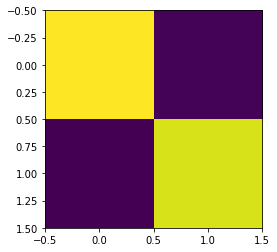

In [0]:
#Calculate FAR and FRR for MLP

#confusion Matrix
cm=metrics.confusion_matrix(y_test, MLP_predictions)
print(cm)
plt.imshow(cm)

TN, FP, FN, TP = metrics.confusion_matrix(y_test, MLP_predictions).ravel()
print("True Negatives: ",TN)
print("False Positives: ",FP)
print("False Negatives: ",FN)
print("True Positives: ",TP)

# # true positive rate
# TPR = TP/(TP+FN)
# print("TPR :", TPR)
# # true negative rate
# TNR = TN/(TN+FP) 
# print("TNR :" ,TNR)

FPR = FP/(FP + TN)
print("FPR / FAR :" ,FPR)

FNR = FN/(TP+FN)
print("FNR / FRR:" ,FNR)

# Overall accuracy
# ACC = (TP+TN)/(TP+FP+FN+TN)
# print("ACCuracy :", ACC)

ERR = (FP+FN)/(TP+FP+FN+TN)
print("ERR :" ,ERR)


In [0]:
MCC= matthews_corrcoef(y_test, randomforest_pred)
print(MCC)

0.9947209838214953
